In [ ]:
import pandas as pd 
import numpy as np
import mlflow

df = pd.read_parquet("./data/data.parquet")
df.to_csv("data.csv",index=False)


In [ ]:
mlflow.set_tracking_uri("./mlruns")

In [2]:
df = pd.read_csv("./data/data.csv")
df.head(5)

C:\Users\heysr\AppData\Local\Temp\ipykernel_23984\3667110586.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/data.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-02-01 00:20:21,2022-02-01 00:24:30,N,1.0,43,238,1.0,1.16,5.5,0.5,0.5,1.02,0.0,NaN,0.3,7.82,1.0,1.0,0.00
1,2,2022-02-01 00:32:26,2022-02-01 00:35:31,N,1.0,166,24,1.0,0.57,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.00
2,1,2022-02-01 00:17:27,2022-02-01 00:44:44,N,1.0,226,219,1.0,0.00,42.2,0.0,0.5,0.00,0.0,NaN,0.3,43.00,1.0,1.0,0.00
3,2,2022-02-01 00:45:37,2022-02-01 01:27:16,N,1.0,89,83,1.0,16.62,49.0,0.5,0.5,0.00,0.0,NaN,0.3,50.30,2.0,1.0,0.00
4,2,2022-02-01 00:06:46,2022-02-01 00:30:06,N,1.0,7,238,1.0,5.97,21.0,0.5,0.5,4.50,0.0,NaN,0.3,29.55,1.0,1.0,2.75


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [4]:
# duration of a ride

df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)

df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime

In [5]:
df.duration = df.duration.apply(lambda td : td.total_seconds() / 60)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2022-02-01 00:20:21,2022-02-01 00:24:30,N,1.0,43,238,1.0,1.16,5.50,...,0.5,1.02,0.0,NaN,0.3,7.82,1.0,1.0,0.00,4.150000
1,2,2022-02-01 00:32:26,2022-02-01 00:35:31,N,1.0,166,24,1.0,0.57,4.50,...,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.00,3.083333
2,1,2022-02-01 00:17:27,2022-02-01 00:44:44,N,1.0,226,219,1.0,0.00,42.20,...,0.5,0.00,0.0,NaN,0.3,43.00,1.0,1.0,0.00,27.283333
3,2,2022-02-01 00:45:37,2022-02-01 01:27:16,N,1.0,89,83,1.0,16.62,49.00,...,0.5,0.00,0.0,NaN,0.3,50.30,2.0,1.0,0.00,41.650000
4,2,2022-02-01 00:06:46,2022-02-01 00:30:06,N,1.0,7,238,1.0,5.97,21.00,...,0.5,4.50,0.0,NaN,0.3,29.55,1.0,1.0,2.75,23.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69394,2,2022-02-28 23:27:00,2022-02-28 23:38:00,NaN,NaN,65,87,NaN,2.61,13.60,...,0.0,3.66,0.0,NaN,0.3,20.31,NaN,NaN,NaN,11.000000
69395,2,2022-02-28 23:59:00,2022-03-01 00:10:00,NaN,NaN,97,231,NaN,2.88,12.07,...,0.0,3.00,0.0,NaN,0.3,18.12,NaN,NaN,NaN,11.000000
69396,2,2022-02-28 23:18:00,2022-02-28 23:27:00,NaN,NaN,74,116,NaN,2.22,10.68,...,0.0,1.22,0.0,NaN,0.3,12.20,NaN,NaN,NaN,9.000000
69397,2,2022-02-28 23:31:00,2022-02-28 23:39:00,NaN,NaN,42,69,NaN,1.59,8.88,...,0.0,0.00,0.0,NaN,0.3,9.18,NaN,NaN,NaN,8.000000


In [6]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    69399.000000
mean        19.899951
std         78.877979
min          0.000000
50%         12.050000
95%         38.616667
98%         54.886000
99%         71.800667
max       1439.850000
Name: duration, dtype: float64

In [7]:
df[((df.duration >= 1) & (df.duration <= 60))]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2022-02-01 00:20:21,2022-02-01 00:24:30,N,1.0,43,238,1.0,1.16,5.50,...,0.5,1.02,0.0,NaN,0.3,7.82,1.0,1.0,0.00,4.150000
1,2,2022-02-01 00:32:26,2022-02-01 00:35:31,N,1.0,166,24,1.0,0.57,4.50,...,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.00,3.083333
2,1,2022-02-01 00:17:27,2022-02-01 00:44:44,N,1.0,226,219,1.0,0.00,42.20,...,0.5,0.00,0.0,NaN,0.3,43.00,1.0,1.0,0.00,27.283333
3,2,2022-02-01 00:45:37,2022-02-01 01:27:16,N,1.0,89,83,1.0,16.62,49.00,...,0.5,0.00,0.0,NaN,0.3,50.30,2.0,1.0,0.00,41.650000
4,2,2022-02-01 00:06:46,2022-02-01 00:30:06,N,1.0,7,238,1.0,5.97,21.00,...,0.5,4.50,0.0,NaN,0.3,29.55,1.0,1.0,2.75,23.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69394,2,2022-02-28 23:27:00,2022-02-28 23:38:00,NaN,NaN,65,87,NaN,2.61,13.60,...,0.0,3.66,0.0,NaN,0.3,20.31,NaN,NaN,NaN,11.000000
69395,2,2022-02-28 23:59:00,2022-03-01 00:10:00,NaN,NaN,97,231,NaN,2.88,12.07,...,0.0,3.00,0.0,NaN,0.3,18.12,NaN,NaN,NaN,11.000000
69396,2,2022-02-28 23:18:00,2022-02-28 23:27:00,NaN,NaN,74,116,NaN,2.22,10.68,...,0.0,1.22,0.0,NaN,0.3,12.20,NaN,NaN,NaN,9.000000
69397,2,2022-02-28 23:31:00,2022-02-28 23:39:00,NaN,NaN,42,69,NaN,1.59,8.88,...,0.0,0.00,0.0,NaN,0.3,9.18,NaN,NaN,NaN,8.000000


In [8]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [9]:
df[categorical] = df[categorical].astype(str)


In [10]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [11]:
# using DictVectorizer to turn categorical + numerical dictionaries into numeric feature matrices that ML models can actually understand.
dv = DictVectorizer()

X_train = dv.fit_transform(train_dicts)
X_train

<69399x476 sparse matrix of type '<class 'numpy.float64'>'
	with 208197 stored elements in Compressed Sparse Row format>

In [12]:
y_train = df['duration'].values
y_train

array([ 4.15      ,  3.08333333, 27.28333333, ...,  9.        ,
        8.        , 21.        ])

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

C:\Users\heysr\AppData\Local\Temp\ipykernel_23984\1212112555.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label =" prediction")
C:\Users\heysr\AppData\Local\Temp\ipykernel_23984\1212112555.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label = "actual")


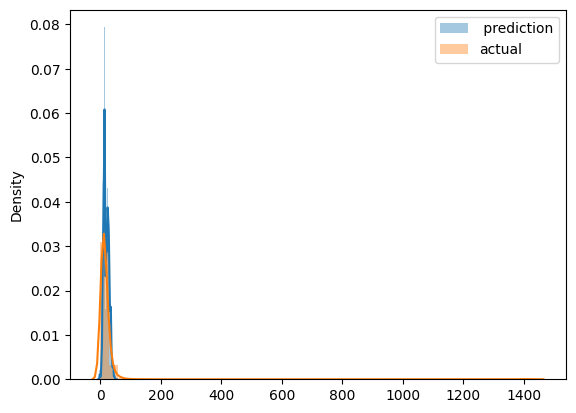

In [17]:
y_pred = lr.predict(X_train)
sns.distplot(y_pred, label =" prediction")
sns.distplot(y_train, label = "actual")

plt.legend()

In [23]:
mean_squared_error(y_train, y_pred)


6144.732571756802

In [26]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [27]:
df_train = read_dataframe('./data/green_tripdata_2021-02.parquet')
df_val = read_dataframe('./data/green_tripdata_2021-03.parquet')

In [28]:
len(df_train),len(df_val)

(61921, 80372)

In [29]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [30]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [31]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

7.463932653486333

In [36]:
import pickle
with open('./models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)